In [7]:
#Bütikofer Kevin, Charles-Lewis Jaggi

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

xl_file = pd.ExcelFile("lausanne-appart.xlsx")

data =  np.array(xl_file.parse("Lausanne-appart")) # sheet name
x = data[:,0]
y = data[:,2]

In [8]:
n = len(x)
x_bias = np.ones((n,1))
x_matrice = np.reshape(x,(n,1))
X = np.append(x_matrice,x_bias,axis=1)
alpha = 0.0000001
epsilon = 0.000001

In [9]:
def sto_gradient_step(h,X,r,theta):
    return theta - (alpha) * (h(x[r])-y[r])*X

def J_theta(h):
    return np.sum(np.square(h(x)-y))/(2*n)

def stop(j_n_1, j):
    return not (j_n_1 -j)/j < epsilon  

In [10]:
r = np.random.randint(n)
thetas = np.array([0.0,0.0])
h = np.poly1d(thetas)
Js = []
Js.append(J_theta(h))

thetas[1]= sto_gradient_step(h,X[r,1],r,thetas[1])
thetas[0]= sto_gradient_step(h,X[r,0],r,thetas[0])
h = np.poly1d(thetas)
Js.append(J_theta(h))
j = 0
while(stop(Js[-2],Js[-1])):
    r = np.random.randint(n)

    thetas[1]= sto_gradient_step(h,X[r,1],r,thetas[1])
    thetas[0]= sto_gradient_step(h,X[r,0],r,thetas[0])
    h = np.poly1d(thetas)
    j += 1
    if j%n == 0:
        Js.append(J_theta(h))
print("number of iteration : ",j)

number of iteration :  5628


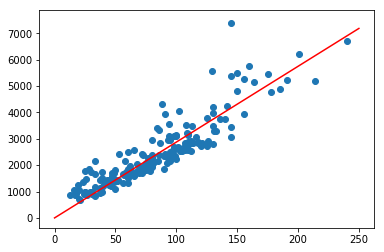

In [11]:
new_x = np.linspace(0, 250, 250)
new_y = h(new_x)
plt.plot(new_x, new_y, color="red")
plt.scatter(x,y)

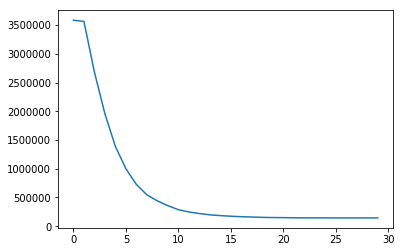

In [12]:
plt.plot(Js)

b) On a besoin de 15*200 = 3000 iterations pour converger

In [13]:
print("Overall cost value: ", Js[-1])

Overall cost value:  144181.90192959885


c) Pour le critère il faudrai mettre un nombre d'iteration maximum au cas ou on diverge mais la fonction des différences d'epoque plus petit qu'epsilon marche bien car la diposition des points permet un bonne regression lineaire

d) Cela depend de l'aléatoire mais approximativement le même coût que l'exercice 3 et plus grand que l'ex 2